# Imports

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gdown

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
sns.set_style(style="darkgrid")
plt.style.use("bmh")

# Download dataset

In [43]:
URL = 'https://drive.google.com/file/d/1HhxadPquWB1JBGTV12KNkhhWD0hVnE1p/view?usp=sharing'
dataset_name = gdown.download(URL, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1HhxadPquWB1JBGTV12KNkhhWD0hVnE1p
To: /home/vroy/Code/MADE/Code/Semester_2/made_ml_in_prod_vroy/notebooks/heart_cleveland_upload.csv
100%|██████████| 11.1k/11.1k [00:00<00:00, 12.1MB/s]


# Load dataset

In [44]:
df = pd.read_csv(dataset_name)
df.rename(columns={'condition':'target'}, inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Data description

1. **age**: age in years
2. **sex**: 
    * 1 = male
    * 0 = female
3. **cp**: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: fasting blood sugar > 120 mg/dl 
    * 1 = true
    * 0 = false
7. **restecg**: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina 
    * 1 = yes
    * 0 = no
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect
14. **target**: presence of heart disease in the patient
    * 0 = disease
    * 1 = no disease

# Exploratory Data Analysis

### Checking missing and null values

In [45]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check class balance

In [47]:
df['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

### Correlation matrix

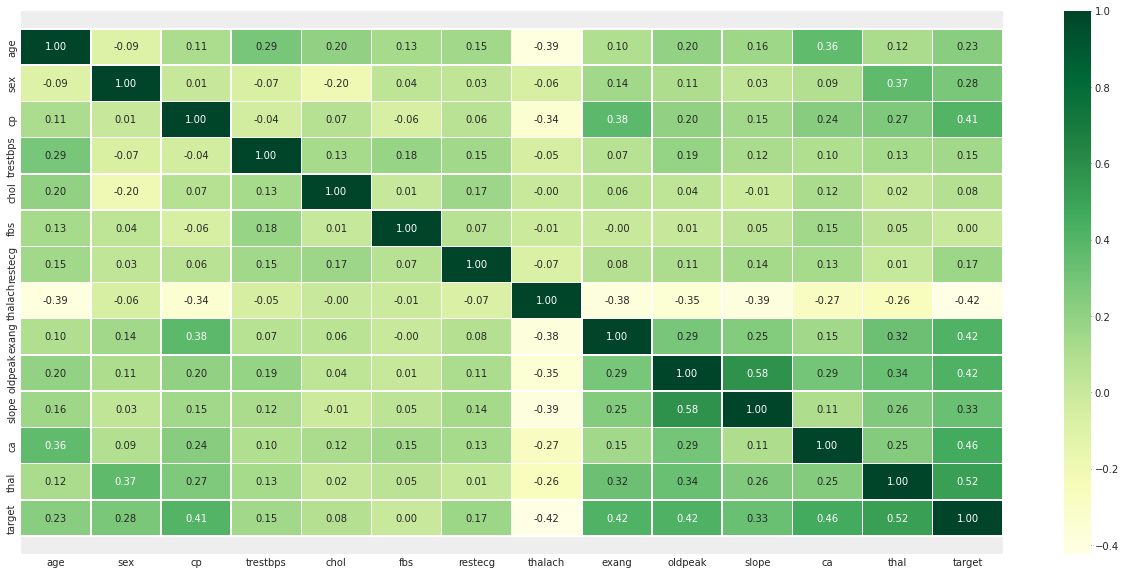

In [48]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Correlation with target

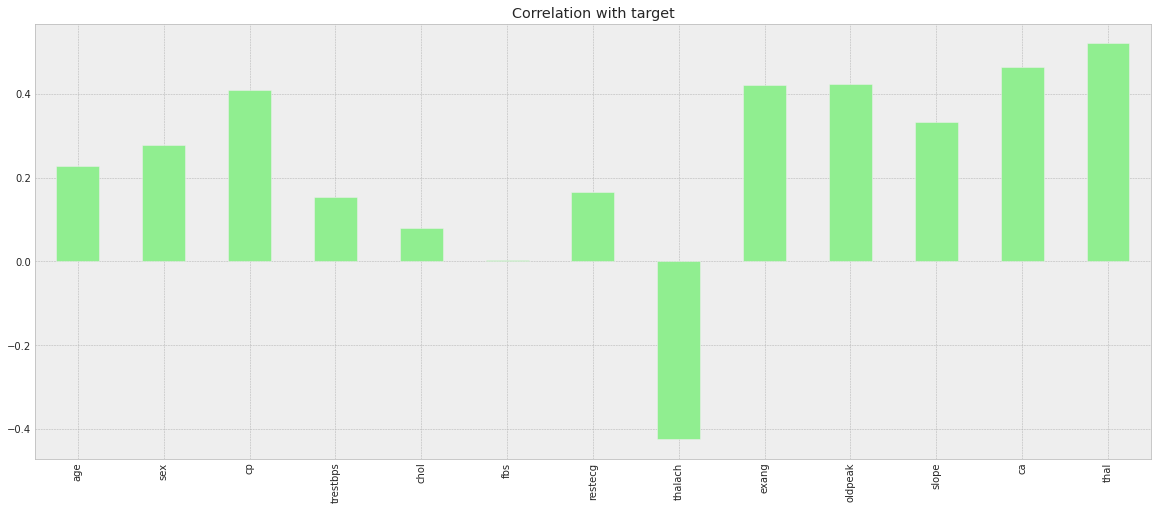

In [49]:
df.drop('target', axis=1).corrwith(df['target']).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="lightgreen");

### Categorical and continous values

In [52]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('-------------------------------')
    print(f"{column} : {sorted(df[column].unique())}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

-------------------------------
age : [29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
-------------------------------
sex : [0, 1]
-------------------------------
cp : [0, 1, 2, 3]
-------------------------------
trestbps : [94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]
-------------------------------
chol : [126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243,

In [51]:
df[categorical_val] = df[categorical_val].astype('category')
df['oldpeak'] = 100 * df['oldpeak']
df[continous_val] = df[continous_val].astype('int')
df['oldpeak'] = df['oldpeak'].astype('float') / 100

### Categorical valuers histogram

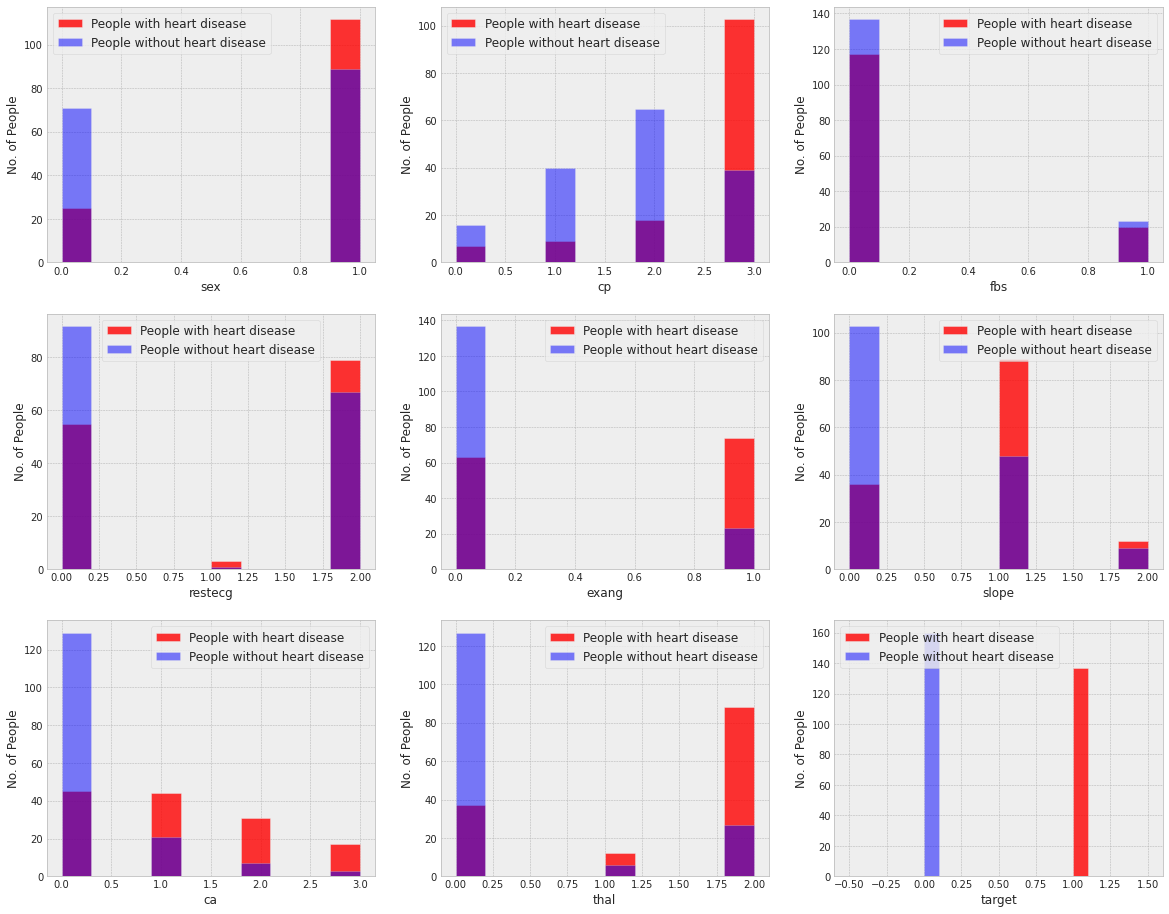

In [30]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 1][column].hist(bins=10, color='red', label='People with heart disease',alpha=0.8)
    df[df["target"] == 0][column].hist(bins=10, color='blue', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

### Continous values histogram

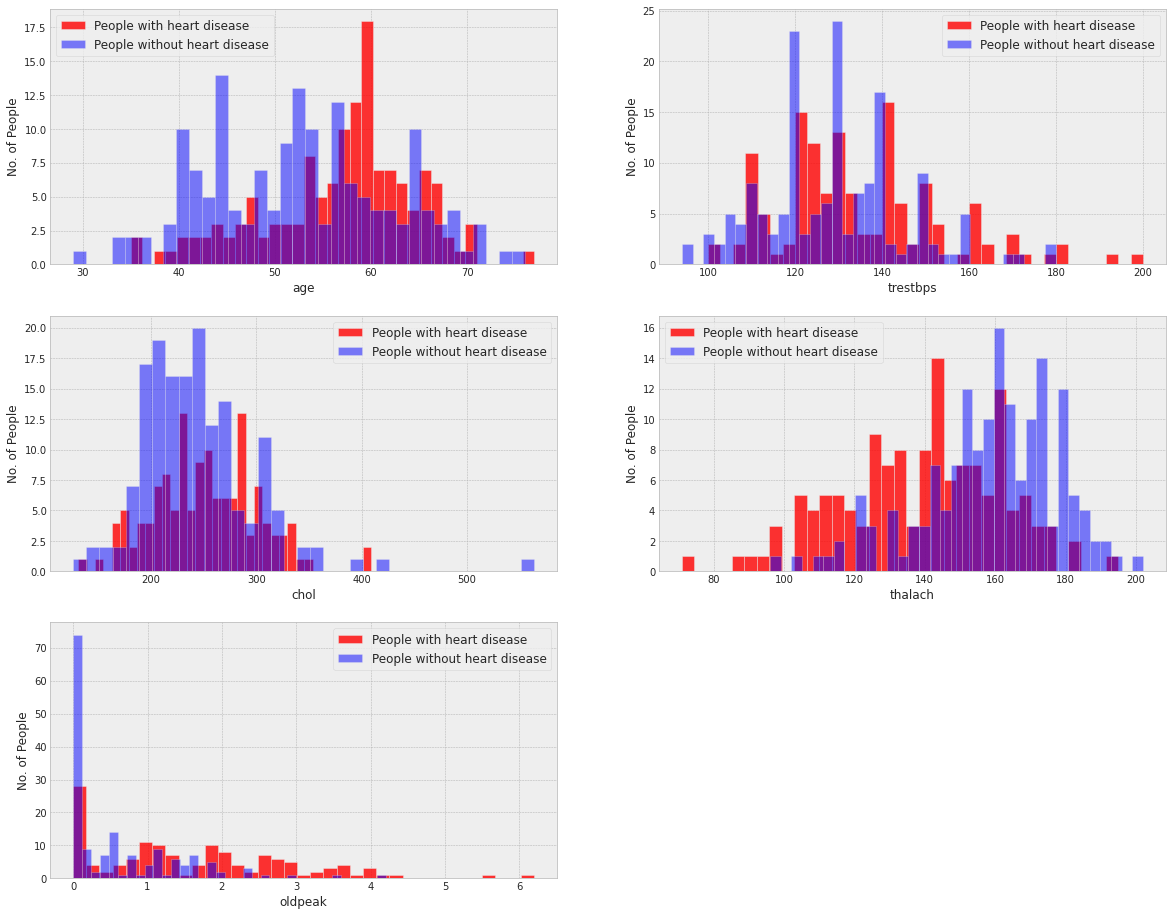

In [31]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='People with heart disease', alpha=0.8)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='People without heart disease',alpha=0.5)
    plt.legend(fontsize=12)
    plt.xlabel(column)
    plt.ylabel("No. of People")

### Pair plot

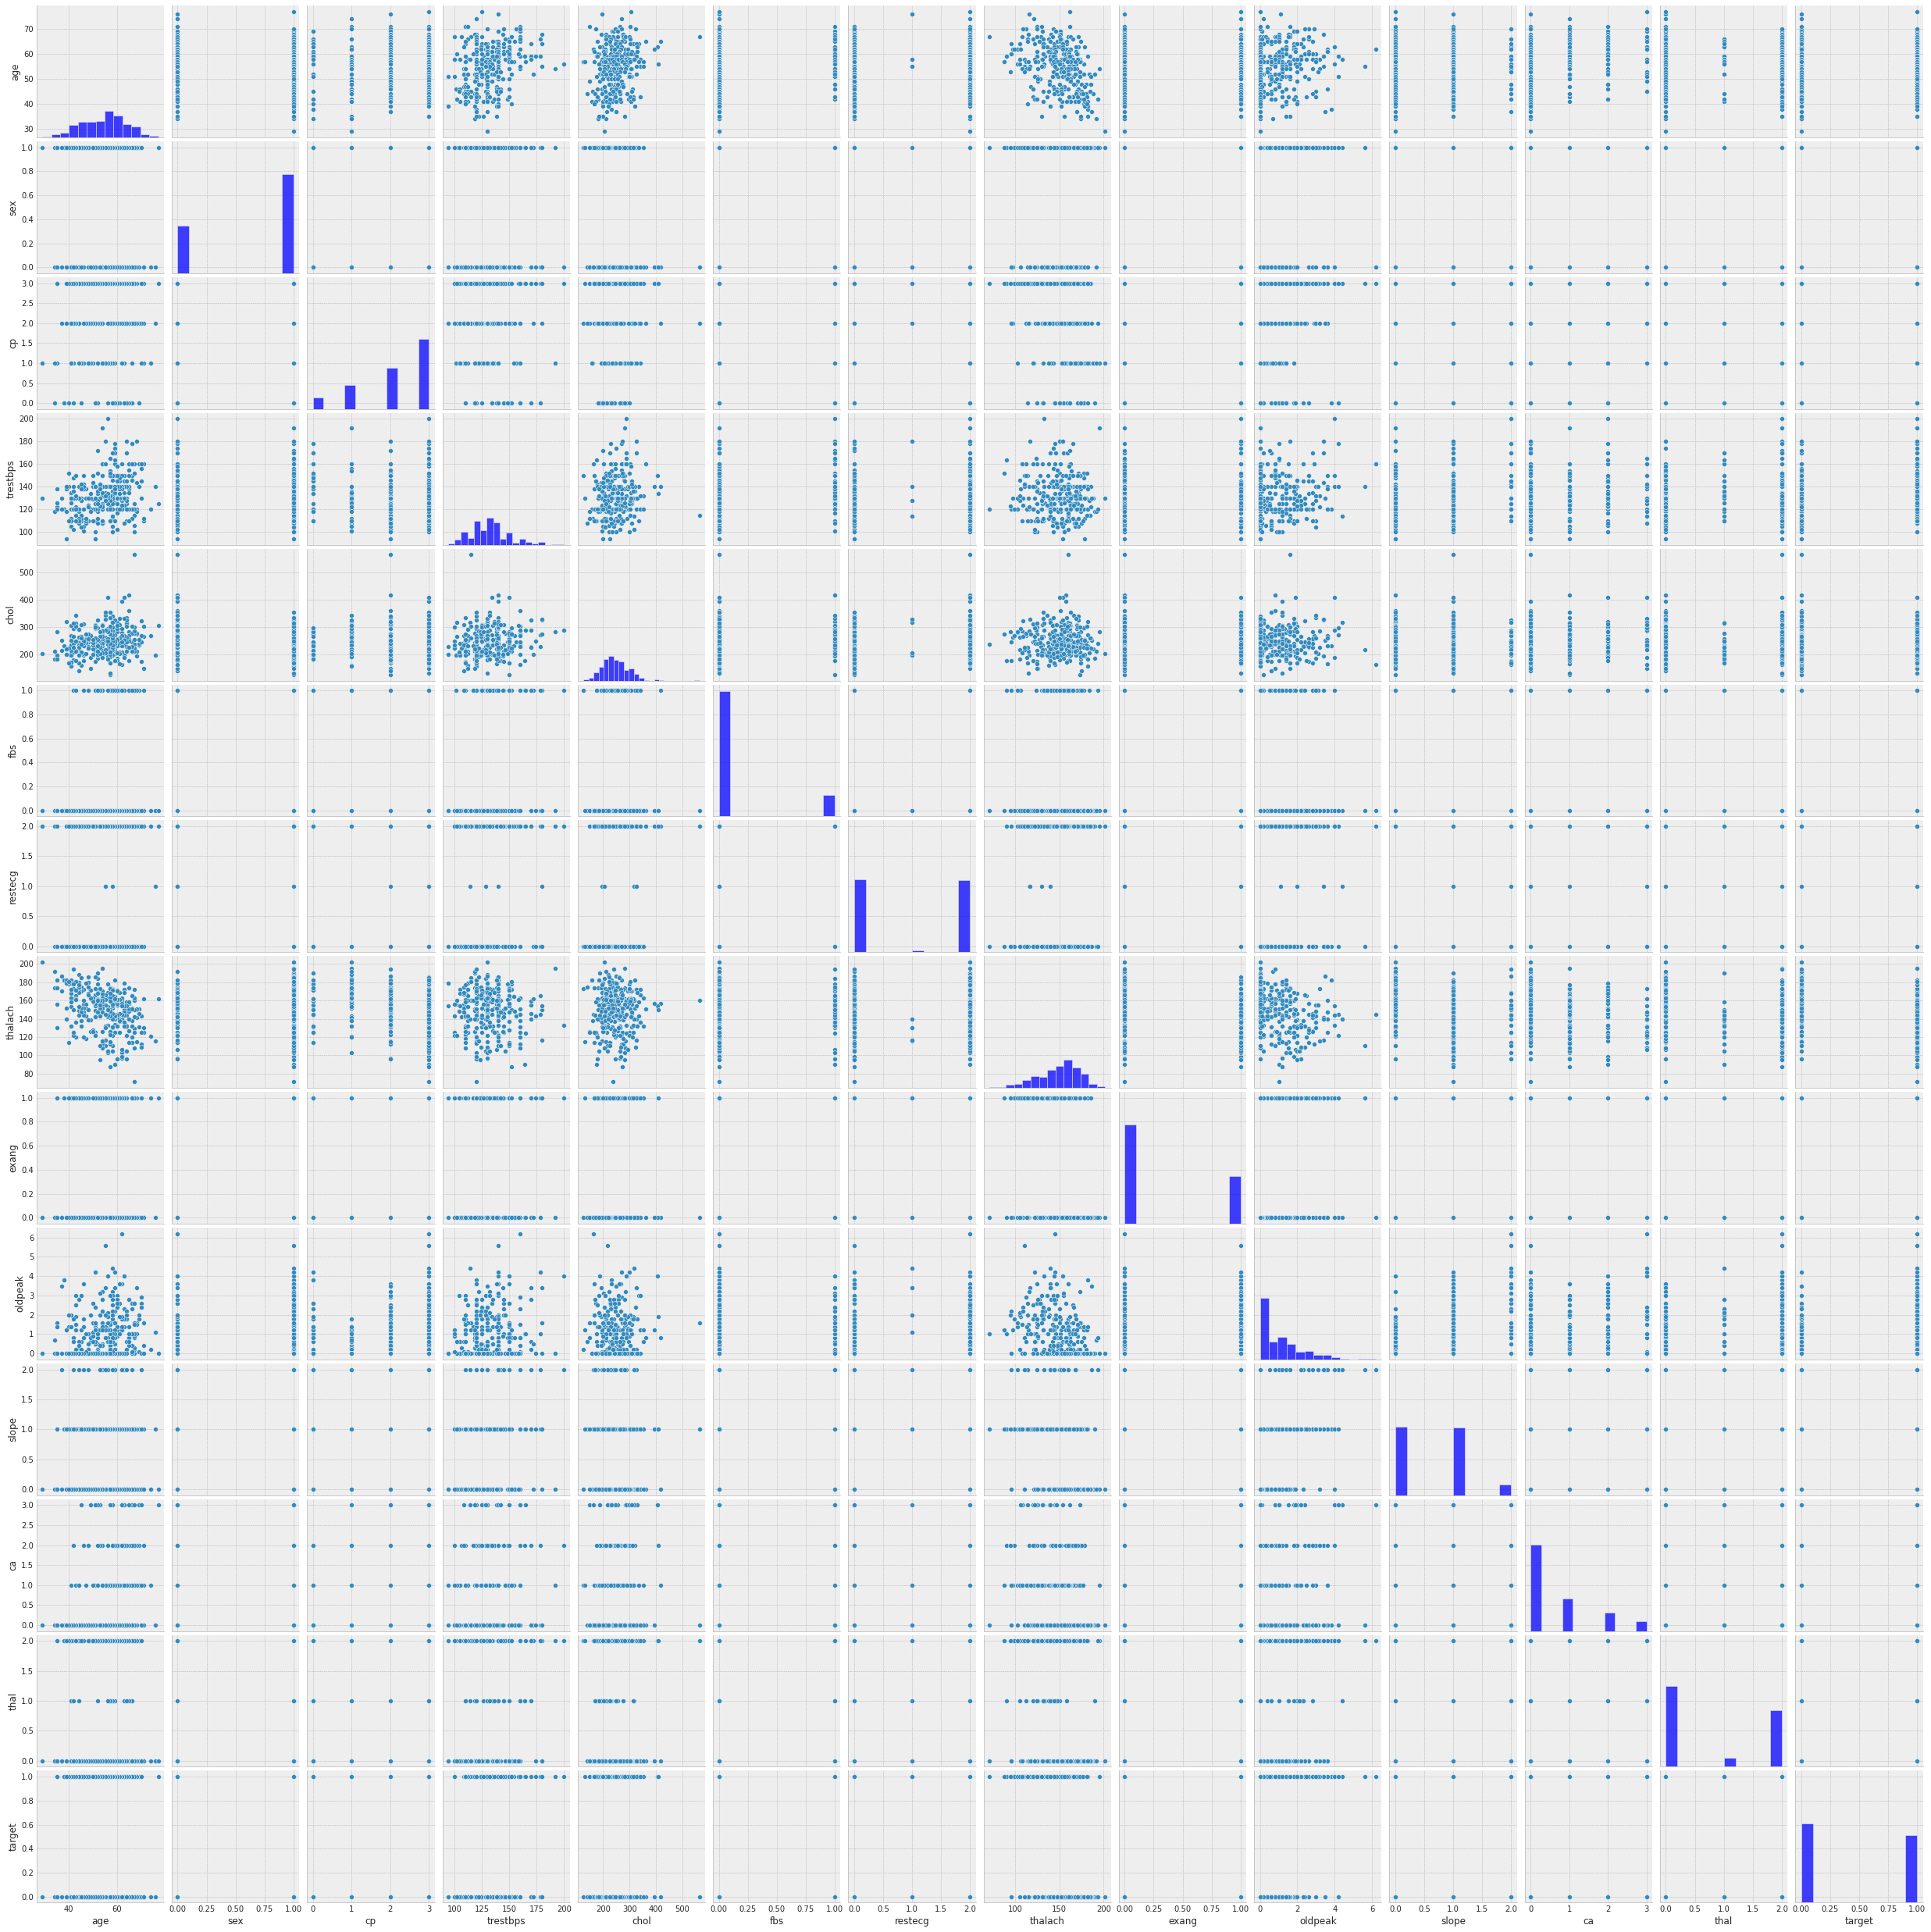

In [29]:
sns.pairplot(data=df)
plt.show()

# Conlusions

* **cp {Chest pain}**: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
* **restecg** {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
* **exang {exercise-induced angina}**: People with a value of 0 (No - angina induced by exercise) have more heart disease than people with a value of 1 (Yes - angina induced by exercise)
* **slope {the slope of the ST segment of peak exercise}**: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
* **ca {number of major vessels (0-3) stained by fluoroscopy}**: The more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
* **thal {thalium stress result}**: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.


# Preprocess data

In [54]:
X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Train some models

## K-NN model

In [55]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors=22)
knn_classifier.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=22)

In [57]:
y_pred_knn = knn_classifier.predict(x_test_std)

In [58]:
knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

0.8333333333333334


## Decision tree

In [70]:
dt_class = DecisionTreeClassifier(criterion='entropy')
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [71]:
y_pred_dt = dt_class.predict(x_test)

In [72]:
dt_acc = accuracy_score(y_test, y_pred_dt)
print(dt_acc)

0.6666666666666666


## Random Forest Classifier

In [79]:
rfc_class = RandomForestClassifier(n_estimators=300)
rfc_class.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [80]:
y_pred_rfc = rfc_class.predict(x_test)

In [82]:
rfc_acc = accuracy_score(y_test, y_pred_rfc)
print(dt_acc)

0.6666666666666666
